<a href="https://colab.research.google.com/github/Angshuman-nits/ML_Projects/blob/main/TransferLearningDogsCats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

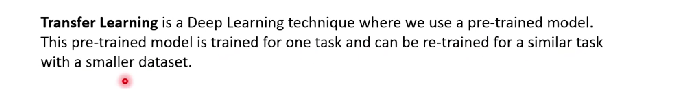

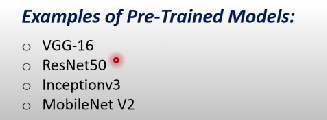

MOBILENETV2 MODEL

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


***Importing the dataset from kaggle***

In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:26<00:00, 33.9MB/s]
100% 812M/812M [00:26<00:00, 31.6MB/s]


In [4]:
!ls

cat.jpeg  dog.jpeg  dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


***PRINTING THE NAME OF THE IMAGES***

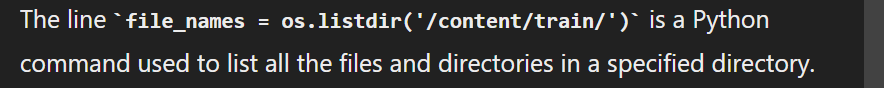

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg', 'dog.6698.jpg', 'cat.5727.jpg', 'cat.6846.jpg', 'dog.486.jpg', 'dog.10724.jpg', 'cat.7566.jpg', 'cat.10200.jpg', 'dog.4066.jpg', 'dog.9343.jpg', 'cat.3997.jpg', 'dog.9354.jpg', 'dog.4416.jpg', 'cat.11766.jpg', 'cat.1670.jpg', 'dog.3935.jpg', 'dog.7026.jpg', 'cat.1507.jpg', 'dog.8613.jpg', 'cat.10814.jpg', 'dog.5392.jpg', 'cat.1582.jpg', 'dog.6179.jpg', 'dog.5085.jpg', 'dog.10973.jpg', 'cat.4108.jpg', 'dog.1150.jpg', 'cat.7092.jpg', 'dog.1083.jpg', 'dog.8447.jpg', 'cat.9303.jpg', 'dog.9520.jpg', 'dog.10554.jpg', 'cat.6272.jpg', 'cat.8338.jpg', 'dog.11604.jpg', 'dog.11813.jpg', 'dog.1047.jpg', 'cat.5457.jpg', 'dog.1924.jpg', 'dog.4666.jpg', 'dog.389.jpg', 'cat.3319.jpg', 'cat.69.jpg', 'cat.5835.jpg', 'dog.234.jpg', 'dog.6137.jpg', 'dog.10999.jpg', 'cat.5323.jpg', 'dog.8379.jpg', 'cat.701.jpg', 'dog.5599.jpg', 'dog.6614.jpg', 'dog.540.jpg', 'dog.2936.jpg', 'dog.625.jpg', 'dog.8862.jpg', 'cat.86.jpg', 'cat.29

In [9]:
#Importing the Dependencies
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow  #since cv2.imshow doesn't work here

***Displaying the images of dogs and cats***

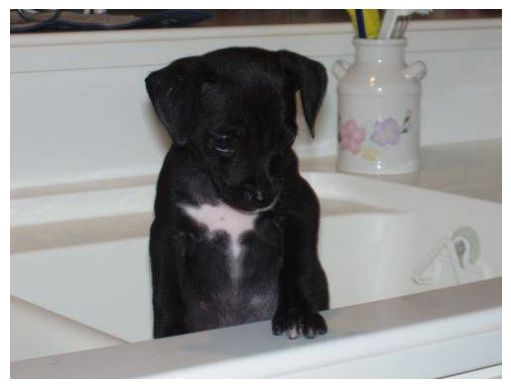

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')  #since this img is present in the train file as shown above
plt.imshow(img)
plt.axis('off')
plt.show()

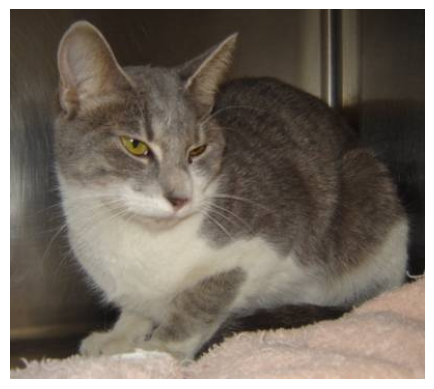

In [11]:
#display cat image
img1= mpimg.imread('/content/train/cat.4352.jpg')
plt.imshow(img1)
plt.axis('off')
plt.show()

In [12]:
file_names = os.listdir('/content/train/')
for i in range(5):

  name = file_names[i]
  print(name[0:3])



cat
dog
dog
dog
cat


***TO FIND NO. OF CATS AND DOGS SEPARATELY***

In [13]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]      #first three letters(dog/cat)

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


***Resizing all the images***

*The line os.mkdir('/content/image resized') is a Python command used to create a new directory*

In [14]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image_resized/'

for i in range(2000):  #for the first 2000 images we're resizing

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename  #we're concatenating the name

  img = Image.open(img_path)  #a function in PIL lib
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

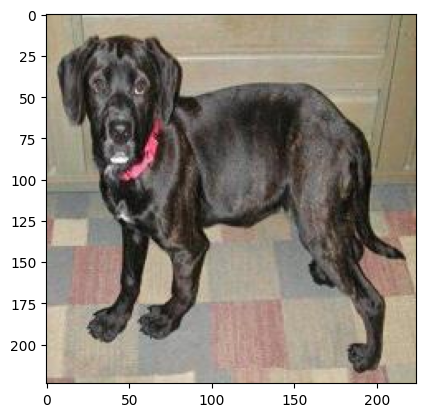

In [16]:
# display resized dog image
img = mpimg.imread('/content/image_resized/dog.10267.jpg')
plt.imshow(img)

plt.show()

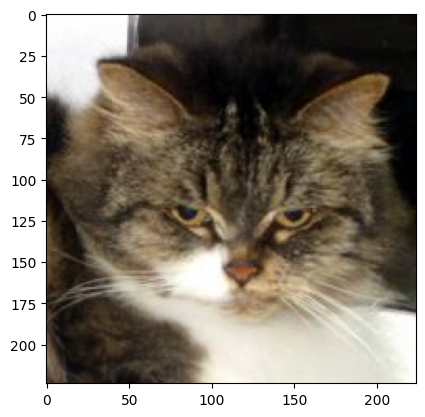

In [17]:
# display resized cat image
img = mpimg.imread('/content/image_resized/cat.9585.jpg')
imgplt = plt.imshow(img)

plt.show()

***Creating labels for resized images of dogs and cats*** \
**Cat --> 0** \
**Dog --> 1**

In [18]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image_resized/')
labels = []
for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [19]:
print(filenames[0:5])
print(len(filenames))

['cat.4554.jpg', 'dog.10336.jpg', 'dog.6151.jpg', 'dog.5083.jpg', 'cat.4657.jpg']
2000


In [20]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [21]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 979 1021]


i.e 979 cats and 1021 dogs

# ***Converting all the resized images to numpy arrays***

In [22]:
import cv2 as cv
import glob

In [23]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv.imread(file) for file in files])

**The line [files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension] is a Python list comprehension used to gather and extend a list of files matching specific extensions in a directory.**

In [24]:
print(dog_cat_images)

[[[[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]]


 [[[ 42 179 171]
   [ 47 184 176]
   [ 55 192 184]
   ...
   [110 209 213]
   [107 206 210]
   [124 223 227]]

  [[ 51 188 180]
   [ 55 192 184]
   [ 61 198 190]
   ...
   [117 216 220]
   [108 207 211]
   [116 215 219]]

  [[ 59 196 188]
   [ 62 199 191]
   [ 65 202 194]
   ...
   [114 214 219]
   [103 203 208]
   [102 202

In [25]:
type(dog_cat_images)

numpy.ndarray

In [26]:
dog_cat_images.shape    #3 for RGB image


(2000, 224, 224, 3)

In [27]:
x=dog_cat_images
y=np.asarray(labels)

***TRAIN TEST SPLIT***

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
x_train.shape,y_train.shape

((1600, 224, 224, 3), (1600,))

In [30]:
x_test.shape,y_test.shape

((400, 224, 224, 3), (400,))

***SCALING THE DATA(so that range is btwn 0 to 1)***

In [31]:
x_train = x_train/255
x_test = x_test/255

In [32]:
print(x_train)

[[[[0.49411765 0.44705882 0.47058824]
   [0.56862745 0.52156863 0.54509804]
   [0.52156863 0.48235294 0.50588235]
   ...
   [0.38823529 0.33333333 0.34901961]
   [0.48627451 0.43921569 0.4627451 ]
   [0.5254902  0.47843137 0.50196078]]

  [[0.50588235 0.45882353 0.48235294]
   [0.55686275 0.50980392 0.53333333]
   [0.51764706 0.47843137 0.50196078]
   ...
   [0.37647059 0.32156863 0.3372549 ]
   [0.46666667 0.41960784 0.44313725]
   [0.49411765 0.44705882 0.47058824]]

  [[0.51372549 0.46666667 0.49019608]
   [0.52941176 0.48235294 0.50588235]
   [0.49803922 0.45882353 0.48235294]
   ...
   [0.39607843 0.34117647 0.35686275]
   [0.47843137 0.43137255 0.45490196]
   [0.49019608 0.44313725 0.46666667]]

  ...

  [[0.41568627 0.39215686 0.41176471]
   [0.40392157 0.38039216 0.4       ]
   [0.40392157 0.38039216 0.4       ]
   ...
   [0.25882353 0.2745098  0.34901961]
   [0.25490196 0.27843137 0.35294118]
   [0.30980392 0.33333333 0.40784314]]

  [[0.41960784 0.39607843 0.41568627]
   [0.4

***Building the Neural Network***

In [33]:
import tensorflow as tf
import tensorflow_hub as hub

In [34]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [35]:
model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(2)   #since, for output layer num_of_classes = 2
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [37]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 69s 1s/step - loss: 0.2525 - accuracy: 0.8825
Epoch 2/5
50/50 [==============================] - 62s 1s/step - loss: 0.0881 - accuracy: 0.9688
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 0.0674 - accuracy: 0.9737
Epoch 4/5
50/50 [==============================] - 61s 1s/step - loss: 0.0531 - accuracy: 0.9825
Epoch 5/5
50/50 [==============================] - 62s 1s/step - loss: 0.0432 - accuracy: 0.9869


In [38]:
score, acc = model.evaluate(x_test, y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0539 - accuracy: 0.9900
Test Loss = 0.053949590772390366
Test Accuracy = 0.9900000095367432


# ***Predictive System***

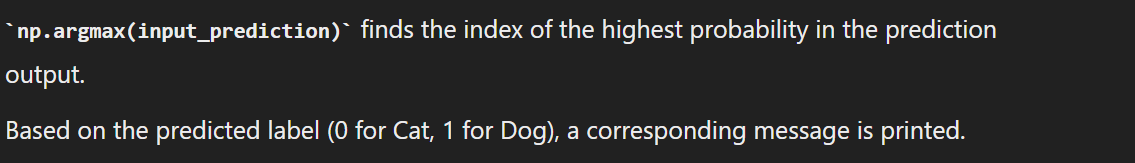

Path of the image to be predicted: /content/dog.jpeg


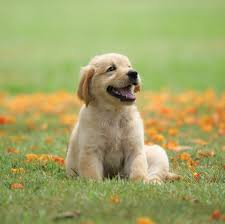

1/1 [==============================] - 1s 849ms/step
[[-4.170429  1.133857]]
1
The image represents a Dog 
 



In [39]:

  input_image_path = input('Path of the image to be predicted: ')
  input_image = cv.imread(input_image_path)
  cv2_imshow(input_image)           #from google.colab.patches
  input_image_resize = cv.resize(input_image, (224,224))
  input_image_scaled = input_image_resize/255
  image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

  input_prediction = model.predict(image_reshaped)
  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)

  if input_pred_label == 0:
    print('The image represents a Cat \n \n')

  else:
    print('The image represents a Dog \n \n')